SINGLE CELL TEST

In [1]:
from brian2 import *


In [41]:
defaultclock.dt = 0.02*ms

Ne = 8
eqse = '''
dv/dt = ( (gle * (Ele-v) + gNae * m**3 * h * (ENae-v) + gKe * n**4 * (EKe-v) + I))/Cme : volt
I : amp*meter**-2
m = alpham / (alpham + betam) :1
dn/dt = alphan * (1-n) - betan * n : 1
dh/dt = alphah * (1-h) - betah * h : 1
alpham = (0.32/mV) * (v+54*mV) / (-exp((-v-54*mV) / (4*mV)) + 1)/ms : Hz
betam = (0.28/mV) * (v+27*mV)/ (exp((v+27*mV)/(5*mV)) - 1)/ms : Hz
alphah = (0.128) * exp(-(v+50*mV)/(18*mV))/ms : Hz
betah = 4/(exp((-v-27*mV) / (5*mV)) + 1)/ms : Hz
alphan = (0.032/mV) * (v+52*mV) / (-exp(-(v+52*mV) / (5*mV)) + 1)/ms : Hz
betan = 0.5*exp(-(v+57*mV)/(40*mV))/ms : Hz
'''

# E cells stats
Cme = 1*ufarad/cm**2
Ele = -67*mV
ENae = 50*mV
EKe = -100*mV
gle = 0.1*msiemens/cm**2
gNae = 100*msiemens/cm**2
gKe = 80*msiemens/cm**2

Ecells = NeuronGroup(Ne, eqse, threshold='v>0*mV',refractory='v > 0*mV',
                method='rk4')
Ecells.v = -60*mV

Ecells.I = linspace(0.1,2.0,(Ne))*uamp*cm**-2

# Ecells.I = linspace(0.1,2.0,(Ne))*amp*meter**-2



mon_v = StateMonitor(Ecells, 'v',record = True)
mon_sp = SpikeMonitor(Ecells,record = True)

In [42]:
sim_time = 500*ms
run(sim_time,report='stdout')

Starting simulation at t=0. s for a duration of 0.5 s
0.5 (100%) simulated in 1s


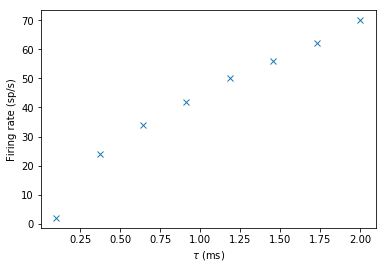

In [45]:
output_rates = mon_sp.count/(sim_time) # firing rate is count/duration
plot(Ecells.I/(uamp*cm**-2), output_rates,'x')
xlabel(r'$\tau$ (ms)')
ylabel('Firing rate (sp/s)');

(0, 100)

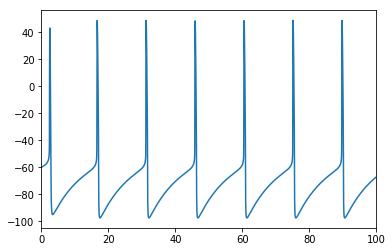

In [36]:
plot(mon_v.t/ms,mon_v[7].v/mV)
plt.xlim(0,100)


In [37]:
spike_trains = mon_sp.spike_trains()
1./(spike_trains[7][3]-spike_trains[7][2])

68.3994528 * hertz

In [44]:
# spike_trains[7]